In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
from itertools import cycle

In [2]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio


Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 99% 423M/429M [00:02<00:00, 152MB/s]
100% 429M/429M [00:02<00:00, 182MB/s]


In [3]:
!unzip ravdess-emotional-speech-audio.zip


Archive:  ravdess-emotional-speech-audio.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-03-01-02-02-01.wav  
  inflating: Actor_01/03-01-03-02-01-01-01.wav  
  inflating: Actor_01/03-01-03-02-01-02-01.wav  
  inflating: Actor_01/03-01-03-02-02-01-01.wav  
  inflating: Actor_01/03

In [4]:
audio_files=glob('/content/audio_speech_actors_01-24/*/*.wav')

In [5]:
len(glob('/content/audio_speech_actors_01-24/*/*.wav'))

1440

In [6]:
ipd.Audio(audio_files[0])

In [7]:
y,sr=librosa.load(audio_files[0])

In [8]:
y

array([ 2.2783310e-05,  3.1151623e-05,  4.7930480e-06, ...,
        1.8884926e-07, -1.7891310e-07,  1.6659804e-07], dtype=float32)

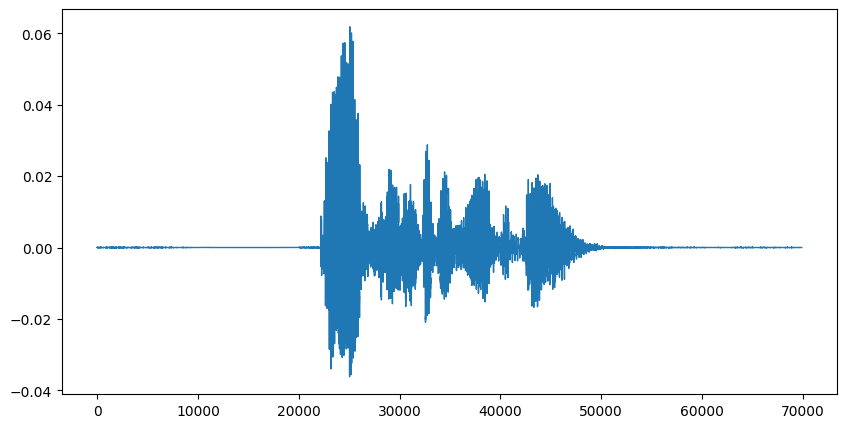

In [9]:
pd.Series(y).plot(figsize=(10,5),lw=1)
plt.show()

In [10]:
y_trimed,_=librosa.effects.trim(y,top_db=20)

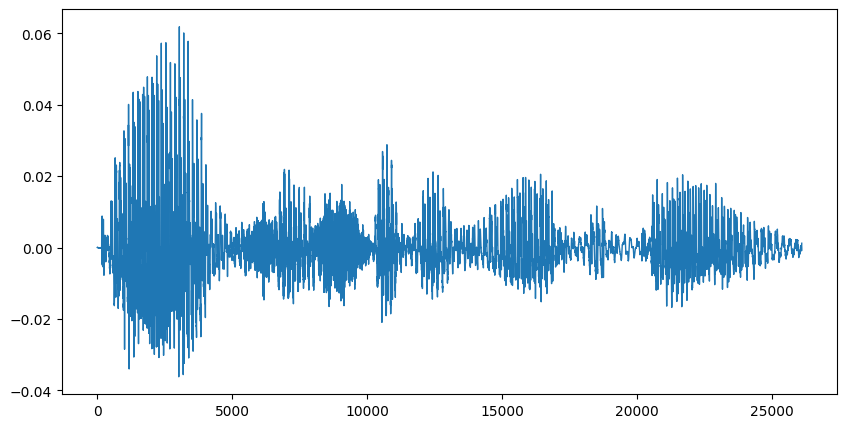

In [11]:
pd.Series(y_trimed).plot(figsize=(10,5),lw=1)
plt.show()

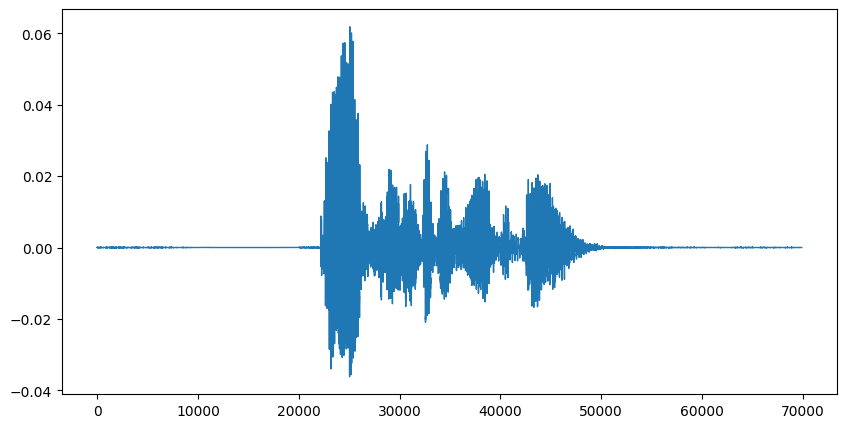

In [12]:
pd.Series(y).plot(figsize=(10,5),lw=1)
plt.show()

In [13]:
D=librosa.stft(y)
s_db=librosa.amplitude_to_db(np.abs(D),ref=np.max)
s_db.shape

(1025, 137)

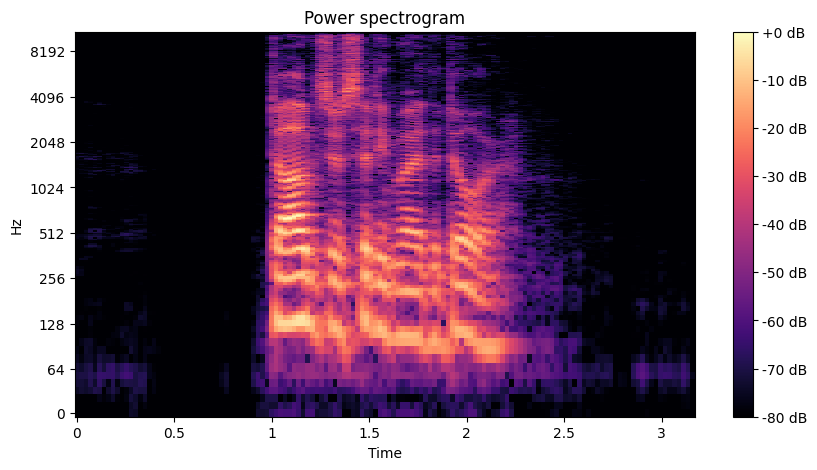

In [14]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
img=librosa.display.specshow(s_db,x_axis='time',y_axis='log',ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

# Mel Spectogram

In [15]:
s=librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128 *2,)
s_db_mel=librosa.amplitude_to_db(s,ref=np.max)

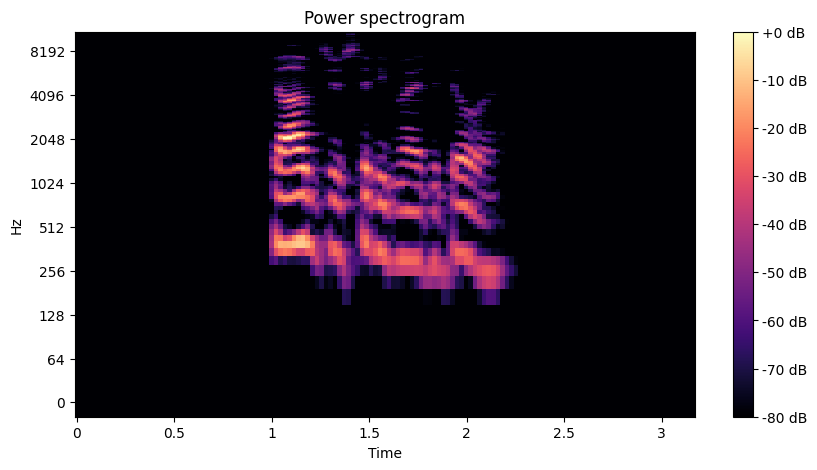

In [16]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
img=librosa.display.specshow(s_db_mel,x_axis='time',y_axis='log',ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [17]:
Ravdess = "/content/audio_speech_actors_01-24"
Ravdess

'/content/audio_speech_actors_01-24'

In [18]:
import os
import glob
import pandas as pd

# Define the root directory for the RAVDESS dataset
ravdess_dir = Ravdess # Replace with your actual directory if different

# Use glob to find all files with a .wav extension in all subdirectories
file_list = glob.glob(os.path.join(ravdess_dir, '**/*.wav'), recursive=True)

file_emotion = []
file_path = []

for file in file_list:
    # Split the file name to extract the emotion
    part = os.path.basename(file).split('.')[0].split('-')
    # The third part in each file represents the emotion associated with that file
    file_emotion.append(int(part[2]))
    # Store the full path
    file_path.append(file)

# Create a dataframe for the emotions of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Create a dataframe for the paths of files
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenate the dataframes along the columns
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Replace emotion numbers with actual emotion labels
Ravdess_df.Emotions.replace({1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}, inplace=True)

# Display the first few rows of the dataframe
Ravdess_df.head()


<ipython-input-18-d45946631ca9>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ravdess_df.Emotions.replace({1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}, inplace=True)


,Emotions,Path
0,neutral,/content/audio_speech_actors_01-24/Actor_01/03...
1,fear,/content/audio_speech_actors_01-24/Actor_01/03...
2,angry,/content/audio_speech_actors_01-24/Actor_01/03...
3,fear,/content/audio_speech_actors_01-24/Actor_01/03...
4,angry,/content/audio_speech_actors_01-24/Actor_01/03...


In [19]:
Ravdess_df

,Emotions,Path
0,neutral,/content/audio_speech_actors_01-24/Actor_01/03...
1,fear,/content/audio_speech_actors_01-24/Actor_01/03...
2,angry,/content/audio_speech_actors_01-24/Actor_01/03...
3,fear,/content/audio_speech_actors_01-24/Actor_01/03...
4,angry,/content/audio_speech_actors_01-24/Actor_01/03...
...,...,...
1435,happy,/content/audio_speech_actors_01-24/Actor_11/03...
1436,surprise,/content/audio_speech_actors_01-24/Actor_11/03...
1437,surprise,/content/audio_speech_actors_01-24/Actor_11/03...
1438,sad,/content/audio_speech_actors_01-24/Actor_11/03...


In [20]:

csv_filename = 'Ravdess_emotion_data.csv'

Ravdess_df.to_csv(csv_filename, index=False)

print(f"DataFrame has been saved as {csv_filename}")


DataFrame has been saved as Ravdess_emotion_data.csv


In [21]:
emotion_mapping={
    'neutral':0,
    'calm':1,
    'happy':2,
    'sad':3,
    'angry':4,
    'fear':5,
    'disgust':6,
    'surprise':7

}

In [22]:
Ravdess_df['Label'] = Ravdess_df['Emotions'].map(emotion_mapping)

In [23]:
Ravdess_df

,Emotions,Path,Label
0,neutral,/content/audio_speech_actors_01-24/Actor_01/03...,0
1,fear,/content/audio_speech_actors_01-24/Actor_01/03...,5
2,angry,/content/audio_speech_actors_01-24/Actor_01/03...,4
3,fear,/content/audio_speech_actors_01-24/Actor_01/03...,5
4,angry,/content/audio_speech_actors_01-24/Actor_01/03...,4
...,...,...,...
1435,happy,/content/audio_speech_actors_01-24/Actor_11/03...,2
1436,surprise,/content/audio_speech_actors_01-24/Actor_11/03...,7
1437,surprise,/content/audio_speech_actors_01-24/Actor_11/03...,7
1438,sad,/content/audio_speech_actors_01-24/Actor_11/03...,3


<ipython-input-24-930df0b5df56>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotions', data=Ravdess_df, palette=emotion_palette)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a

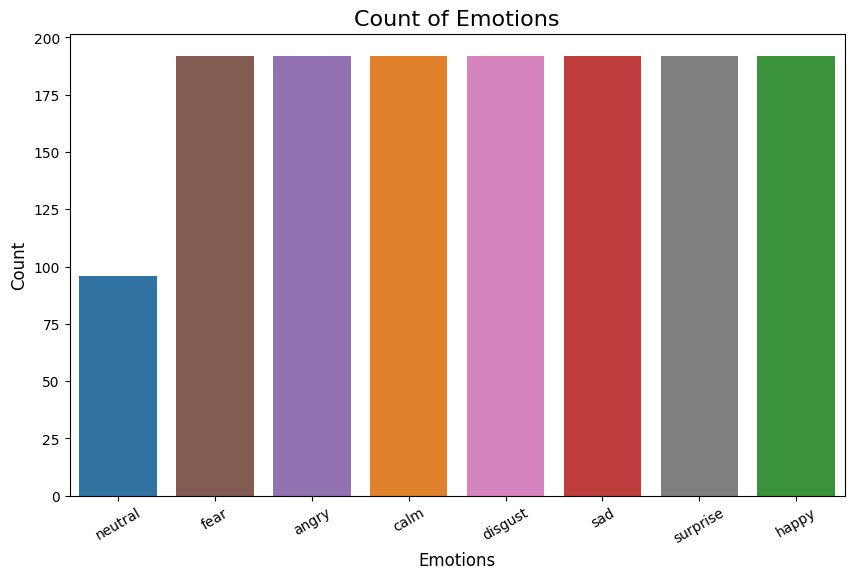

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

emotion_colors = {
    'neutral': '#1f77b4',   # Blue
    'calm': '#ff7f0e',      # Orange
    'happy': '#2ca02c',     # Green
    'sad': '#d62728',       # Red
    'angry': '#9467bd',     # Purple
    'fear': '#8c564b',      # Brown
    'disgust': '#e377c2',   # Pink
    'surprise': '#7f7f7f'   # Grey
}

emotion_palette = [emotion_colors[emotion] for emotion in Ravdess_df['Emotions'].unique()]
plt.figure(figsize=(10, 6))
plt.title('Count of Emotions', size=16)
sns.countplot(x='Emotions', data=Ravdess_df, palette=emotion_palette)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=30, size=10)  # Optional: Rotate x-axis labels for better visibility
plt.show()


In [25]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

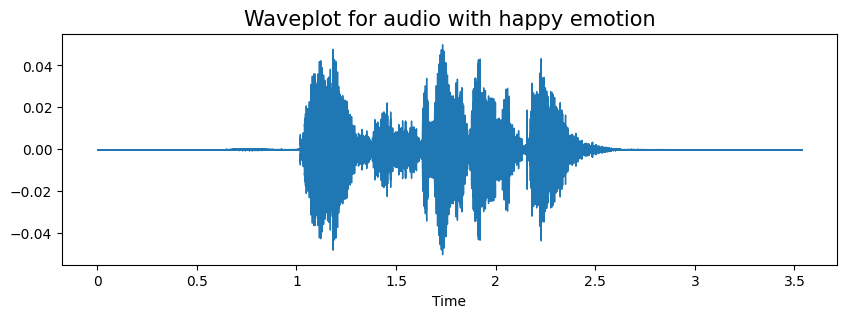

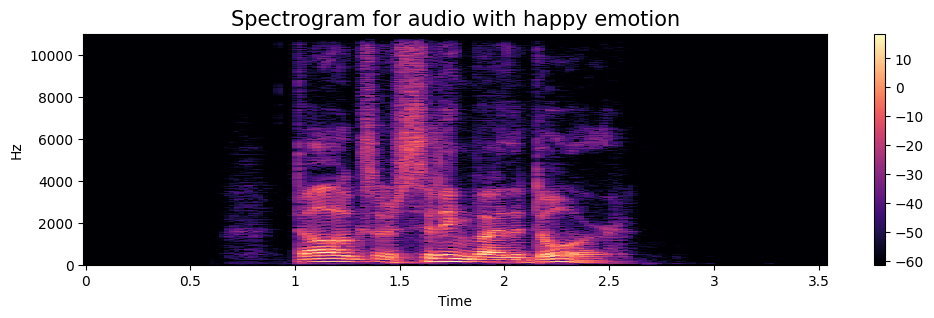

In [26]:
emotion='happy'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[5]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)


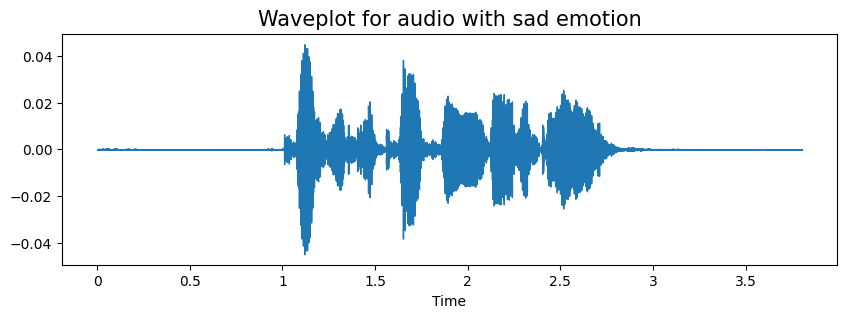

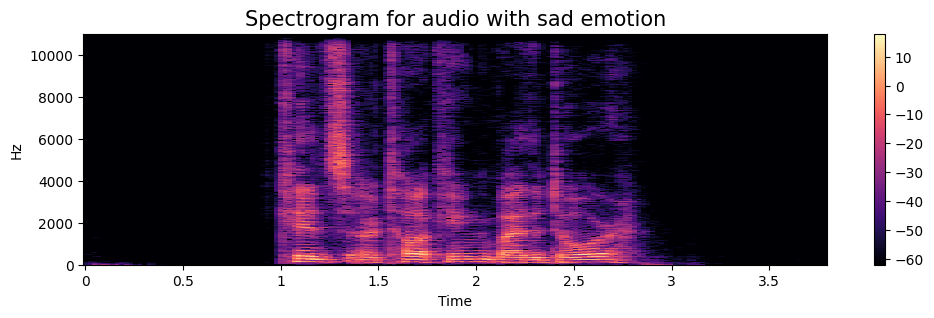

In [27]:
emotion='sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
ipd.Audio(path)

# **DATA AGUMENTATION**

In [28]:
def noise(data):
    noise_amp = 0.01 *np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, n_steps=2):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=0.7)



path = np.array(Ravdess_df.Path)[2]
data, sample_rate = librosa.load(path)

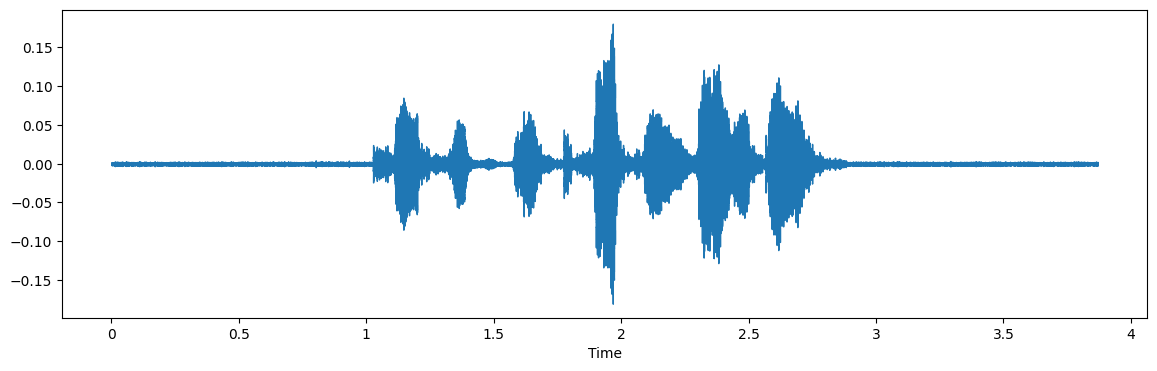

In [29]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

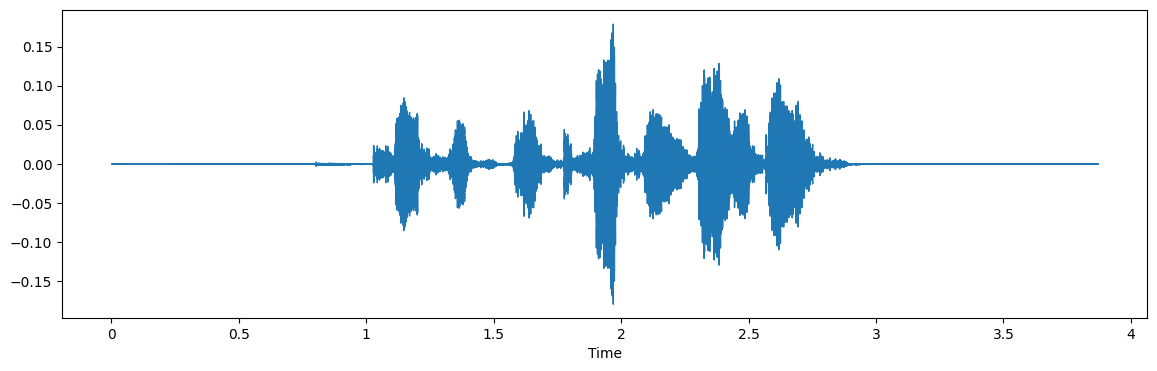

In [30]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
ipd.Audio(path)

# **FEATURE EXTRACTION**

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from tqdm import tqdm

In [32]:
sample_rate = 16000
n_mels = 128
hop_length = 635
f_max = 8000
n_fft = 800
win_length = 800

In [33]:
output_dir = '/content/mel_spectrograms'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [34]:
def extract_mel_spectrogram(file_path, sample_rate, output_file, n_mels, hop_length,fmax,labels):
    try:
        audio, sr = librosa.load(file_path, sr=sample_rate)

        mel_spect = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels, hop_length=hop_length, fmax=fmax)
        mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)

        output_file = os.path.join(output_dir, f"{labels}_{os.path.basename(file_path).split('.')[0]}.png")
        plt.figure(figsize=(10,4))
        librosa.display.specshow(mel_spect_db, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
        plt.axis('off')
#         plt.colorbar(format='%+2.0f dB')
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
        plt.close()
    except Exception as e:
        print(f"Error processing file {file_path}:{e}")

In [35]:
for index, row in Ravdess_df.iterrows():
    file_path = row['Path']
    emotion = row['Label']
    extract_mel_spectrogram(file_path,sample_rate,output_dir,n_mels,hop_length,f_max,emotion)

print(f"Mel-Spectrograms saved to {output_dir}")

Mel-Spectrograms saved to /content/mel_spectrograms


In [36]:
mels_dir = '/content/mel_spectrograms'

if os.path.exists(mels_dir):
    num_files = len(os.listdir(mels_dir))
else:
    num_files = 0

num_files

1440

# **LLFs Features**

In [37]:
from sklearn.preprocessing import StandardScaler
from skimage.transform import resize

In [38]:
def extract_llf_features(audio_data, sr, n_fft, win_length, hop_length):

    rms = librosa.feature.rms(y=audio_data, frame_length=win_length, hop_length=hop_length, center=False)
    chroma = librosa.feature.chroma_stft(n_chroma=17,y=audio_data, sr=sr, n_fft=n_fft, win_length=win_length, hop_length=hop_length, center=False)
    spectral_centroid = librosa.feature.spectral_centroid(y=audio_data, sr=sr, n_fft=n_fft, win_length=win_length, hop_length=hop_length, center=False)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_data, sr=sr, n_fft=n_fft, win_length=win_length, hop_length=hop_length, center=False)
    spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sr, n_fft=n_fft, win_length=win_length, hop_length=hop_length, center=False)
    spectral_flatness = librosa.feature.spectral_flatness(y=audio_data, n_fft=n_fft, win_length=win_length, hop_length=hop_length, center=False)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sr, n_fft=n_fft, win_length=win_length, hop_length=hop_length, center=False)
    poly_features = librosa.feature.poly_features(y=audio_data, sr=sr, n_fft=n_fft, win_length=win_length, hop_length=hop_length, center=False)
    zcr = librosa.feature.zero_crossing_rate(y=audio_data, frame_length=win_length, hop_length=hop_length, center=False)
    feats = np.vstack((chroma, #12
                spectral_contrast, #7
                spectral_centroid, #1
                spectral_bandwidth, #1
                spectral_flatness, #1
                spectral_rolloff, #1
                poly_features, #2
                rms, #1
                zcr #1
                ))

    scaler = StandardScaler()
    feats = scaler.fit_transform(feats.T).T
    feats = librosa.power_to_db(feats)

    return feats

In [39]:
llfs_output_dir='/content/llfs'
if not os.path.exists(llfs_output_dir):
    os.makedirs(llfs_output_dir)

In [40]:
def save_llf(file_path, sample_rate,  output_dir, labels, n_fft=2048, win_length=1024, hop_length=512):
    try:
        audio_data, _ = librosa.load(file_path, sr=sample_rate)

        if audio_data.size == 0:
            print(f"Warning: Audio data is empty for file {file_path}. Skipping this file.")
            return None

        mfcc_db= extract_llf_features(audio_data,sample_rate, n_fft, win_length, hop_length)


        if mfcc_db.size == 0:
            print(f"Warning: MFCC features are empty for file {file_path}. Skipping this file.")
            return None

        delta_mfcc = librosa.feature.delta(mfcc_db)
        delta2_mfcc = librosa.feature.delta( mfcc_db, order=2)

        combined_features = np.concatenate([mfcc_db, delta_mfcc, delta2_mfcc], axis=1)
        combined_features = resize(combined_features, (32, 128), anti_aliasing=True)




        output_file = os.path.join(output_dir, f"{labels}_{os.path.basename(file_path).split('.')[0]}.png")

        plt.figure(figsize=(10, 4))
        plt.imshow(combined_features, cmap='viridis', aspect='auto', origin='lower')
#         plt.colorbar(format='%+2.0f dB')
        plt.xticks([])   # Ẩn nhãn trục X
        plt.yticks([])   # Ẩn nhãn trục Y
        plt.axis('off')
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
        plt.close()

        return output_file
    except Exception as e:
        print(f"Error processing file {file_path} for LLF extraction: {e}")

In [41]:
for index, row in Ravdess_df.iterrows():
    file_path = row['Path']
    emotion = row['Label']
    save_llf(file_path, sample_rate, llfs_output_dir,emotion,n_fft, win_length , hop_length)
print(f"LLFs saved to {llfs_output_dir}")

LLFs saved to /content/llfs


# **combining**

In [42]:
from PIL import Image

def combine_images_if_same_filename(mel_spectrogram_path, llf_path, output_dir):
    try:
        mel_filename = os.path.basename(mel_spectrogram_path).split('.')[0]
        llf_filename = os.path.basename(llf_path).split('.')[0]

        # Kiểm tra nếu tên file giống nhau
        if mel_filename == llf_filename:
            print(f"Combining {mel_filename} and {llf_filename}")

            # Đọc ảnh Mel-spectrogram và LLF
            mel_img = Image.open(mel_spectrogram_path)
            llf_img = Image.open(llf_path)

            # Chọn kích thước lớn nhất giữa hai ảnh
            new_width = max(mel_img.width, llf_img.width)
            new_height = max(mel_img.height, llf_img.height)

            # Resize cả hai ảnh về cùng kích thước
            mel_img_resized = mel_img.resize((new_width, new_height))
            llf_img_resized = llf_img.resize((new_width, new_height))

            combined_img = np.vstack((np.array(mel_img_resized), np.array(llf_img_resized)))

            # Convert lại thành ảnh
            combined_img = Image.fromarray(combined_img)

            # Tạo thư mục lưu nếu chưa tồn tại
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)

            # Lưu ảnh kết hợp với tên file giống với file Mel hoặc LLF
            output_file = os.path.join(output_dir, f"{mel_filename}.png")
            combined_img.save(output_file)

            # Hiển thị ảnh đã kết hợp
            plt.imshow(combined_img)
            plt.axis('off')
#             plt.show()

            return output_file
        else:
            print(f"Filenames do not match: {mel_filename} and {llf_filename}. Skipping.")
            return None
    except Exception as e:
        print(f"Error combining images: {e}")
        return None

In [43]:
combine_output_dir='/content/combine_image'
if not os.path.exists(combine_output_dir):
    os.makedirs(combine_output_dir)

Combining 0_03-01-01-01-01-01-01 and 0_03-01-01-01-01-01-01


'/content/combine_image/0_03-01-01-01-01-01-01.png'

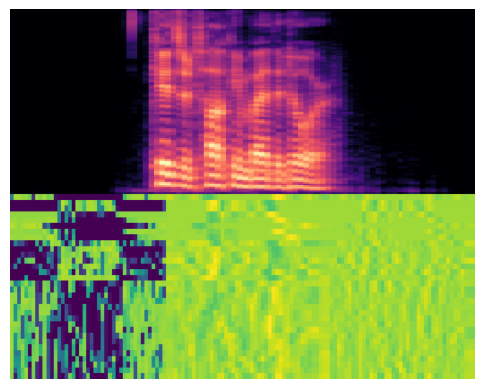

In [44]:
sample_combine_mel = '/content/mel_spectrograms/0_03-01-01-01-01-01-01.png'
sample_combine_llf = '/content/llfs/0_03-01-01-01-01-01-01.png'
combine_images_if_same_filename(sample_combine_mel, sample_combine_llf , combine_output_dir)

Combining 0_03-01-01-01-02-01-07 and 0_03-01-01-01-02-01-07
Combining 5_03-01-06-02-01-01-19 and 5_03-01-06-02-01-01-19
Combining 1_03-01-02-01-01-01-13 and 1_03-01-02-01-01-01-13
Combining 6_03-01-07-02-01-01-12 and 6_03-01-07-02-01-01-12
Combining 6_03-01-07-01-01-02-19 and 6_03-01-07-01-01-02-19
Combining 1_03-01-02-02-02-01-08 and 1_03-01-02-02-02-01-08
Combining 6_03-01-07-02-01-01-23 and 6_03-01-07-02-01-01-23
Combining 7_03-01-08-01-01-01-23 and 7_03-01-08-01-01-01-23
Combining 7_03-01-08-02-01-01-20 and 7_03-01-08-02-01-01-20
Combining 1_03-01-02-02-01-02-02 and 1_03-01-02-02-01-02-02
Combining 6_03-01-07-01-01-02-01 and 6_03-01-07-01-01-02-01
Combining 1_03-01-02-02-02-01-24 and 1_03-01-02-02-02-01-24
Combining 6_03-01-07-02-01-01-09 and 6_03-01-07-02-01-01-09
Combining 2_03-01-03-01-01-01-17 and 2_03-01-03-01-01-01-17
Combining 1_03-01-02-01-01-01-23 and 1_03-01-02-01-01-01-23
Combining 4_03-01-05-01-02-02-23 and 4_03-01-05-01-02-02-23
Combining 2_03-01-03-02-01-02-16 and 2_0

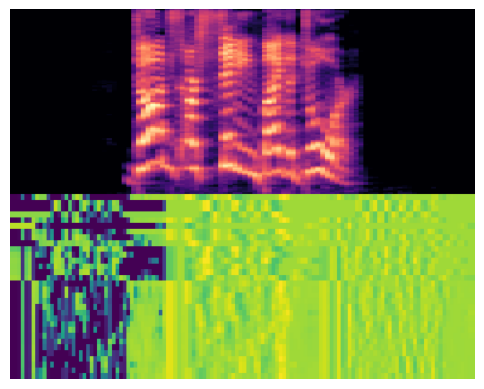

In [45]:
mel_dir = '/content/mel_spectrograms'
llf_dir = '/content/llfs'
combine_output_dir = '/content/combine_image'

if not os.path.exists(combine_output_dir):
    os.makedirs(combine_output_dir)

for mel_file in os.listdir(mel_dir):
    mel_file_path = os.path.join(mel_dir, mel_file)

    if os.path.isfile(mel_file_path):

        mel_filename = mel_file.split('.')[0]
        llf_file_path = os.path.join(llf_dir, f"{mel_filename}.png")


        if os.path.isfile(llf_file_path):

            combine_images_if_same_filename(mel_file_path, llf_file_path, combine_output_dir)
        else:
            print(f"LLF file not found for {mel_filename}. Skipping.")

In [46]:
import torch
import random
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split

In [47]:
class EmotionDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.image_files[idx])
        image = Image.open(img_name).convert('RGB')  # Đảm bảo hình ảnh có 3 kênh

        # Lấy nhãn từ tên file
        label = int(self.image_files[idx].split('_')[0])  # Nhãn được lưu ở phần đầu tên file

        if self.transform:
            image = self.transform(image)

        # In kích thước hình ảnh và loại
#         print(f"Image size: {image.size} | Label: {label}")  # In kích thước hình ảnh và nhãn
#         print(f"Image tensor shape: {image.shape}")  # In kích thước tensor hình ảnh

        return image, label

In [48]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Thay đổi kích thước

    transforms.RandomHorizontalFlip(),  # Lật ngẫu nhiên theo chiều ngang
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Thay đổi độ sáng, độ tương phản, độ bão hòa và sắc độ

    transforms.ToTensor(),           # Chuyển đổi sang tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

image_dir = '/content/combine_image'
dataset = EmotionDataset(image_dir, transform=transform)

# Tạo DataLoader
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Kiểm tra dữ liệu
for images, labels in data_loader:
    print(images.shape)
    print(labels)
    break

torch.Size([32, 3, 224, 224])
tensor([1, 6, 0, 0, 1, 2, 4, 7, 6, 3, 4, 3, 3, 5, 3, 5, 7, 7, 2, 7, 4, 0, 4, 7,
        4, 2, 6, 7, 4, 1, 3, 3])


# **Split Dataset**

In [49]:
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f'Train dataset size: {len(train_dataset)}')
print(f'Validation dataset size: {len(val_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')

Train dataset size: 1007
Validation dataset size: 216
Test dataset size: 217


In [50]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
from transformers import get_linear_schedule_with_warmup
from tqdm import tqdm

/usr/local/lib/python3.10/dist-packages/torch_xla/__init__.py:202: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


In [51]:
class CustomResNet50(nn.Module):
    def __init__(self, num_classes=8):
        super(CustomResNet50, self).__init__()

        # Load pretrained ResNet50
        self.resnet = models.resnet50(pretrained=True)

        self.resnet.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        # Replace the fully connected layer
        self.resnet.fc = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, num_classes)
        )

        for param in self.resnet.parameters():
            param.requires_grad = False

        for param in self.resnet.layer3.parameters():
            param.requires_grad = True

        for param in self.resnet.layer4.parameters():
            param.requires_grad = True

        for param in self.resnet.fc.parameters():
            param.requires_grad = True

    def forward(self, x):
        return self.resnet(x)


In [58]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomResNet50(num_classes=8).to(device)

In [53]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [54]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)  # Tính toán hàm mất mát
            loss.backward()  # Backward pass
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)  # Lấy nhãn dự đoán
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  # Đếm số dự đoán đúng

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct / total
        print(f'Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}')

        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for val_images, val_labels in val_loader:
                val_images, val_labels = val_images.to(device), val_labels.to(device)
                val_outputs = model(val_images)
                val_loss += criterion(val_outputs, val_labels).item()
                _, val_predicted = torch.max(val_outputs.data, 1)
                val_total += val_labels.size(0)
                val_correct += (val_predicted == val_labels).sum().item()

        val_loss /= len(val_loader)
        val_accuracy = val_correct / val_total
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')



def test_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss /= len(test_loader)
    test_accuracy = correct / total

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

In [55]:
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)
test_model(model, test_loader, criterion)

Epoch 1/10: 100%|██████████| 32/32 [00:53<00:00,  1.67s/batch]


Train Loss: 2.0329, Train Accuracy: 0.2175
Validation Loss: 1.8943, Validation Accuracy: 0.3426


Epoch 2/10: 100%|██████████| 32/32 [00:52<00:00,  1.65s/batch]


Train Loss: 1.7099, Train Accuracy: 0.4121
Validation Loss: 1.5006, Validation Accuracy: 0.4769


Epoch 3/10: 100%|██████████| 32/32 [00:53<00:00,  1.68s/batch]


Train Loss: 1.3548, Train Accuracy: 0.5402
Validation Loss: 1.3430, Validation Accuracy: 0.5370


Epoch 4/10: 100%|██████████| 32/32 [00:53<00:00,  1.69s/batch]


Train Loss: 1.1570, Train Accuracy: 0.6276
Validation Loss: 1.1976, Validation Accuracy: 0.6296


Epoch 5/10: 100%|██████████| 32/32 [00:53<00:00,  1.68s/batch]


Train Loss: 0.9648, Train Accuracy: 0.7031
Validation Loss: 1.1206, Validation Accuracy: 0.6111


Epoch 6/10: 100%|██████████| 32/32 [00:54<00:00,  1.69s/batch]


Train Loss: 0.7896, Train Accuracy: 0.7756
Validation Loss: 1.0553, Validation Accuracy: 0.5972


Epoch 7/10: 100%|██████████| 32/32 [00:53<00:00,  1.68s/batch]


Train Loss: 0.6362, Train Accuracy: 0.8252
Validation Loss: 0.9991, Validation Accuracy: 0.6574


Epoch 8/10: 100%|██████████| 32/32 [00:53<00:00,  1.69s/batch]


Train Loss: 0.5619, Train Accuracy: 0.8481
Validation Loss: 1.0669, Validation Accuracy: 0.6667


Epoch 9/10: 100%|██████████| 32/32 [00:54<00:00,  1.69s/batch]


Train Loss: 0.4542, Train Accuracy: 0.8838
Validation Loss: 0.8789, Validation Accuracy: 0.6944


Epoch 10/10: 100%|██████████| 32/32 [00:54<00:00,  1.71s/batch]


Train Loss: 0.3628, Train Accuracy: 0.9146
Validation Loss: 0.9258, Validation Accuracy: 0.7037
Test Loss: 0.9671, Test Accuracy: 0.6636


In [70]:
import torch


model = CustomResNet50(num_classes=8).to(device)


torch.save(model.state_dict(), 'model.pth')


In [71]:
# Save only the state dict
torch.save(model.state_dict(), 'model_state_dict.pth')


In [82]:
# Define your model architecture again
model = CustomResNet50(num_classes=8)  # Adjust this to your actual model class
model.load_state_dict(torch.load('model_state_dict.pth'))  # Load the state dict
model.eval()  # Set the model to evaluation mode


<ipython-input-82-43d56394d7df>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_state_dict.pth'))  # Load the state dict


CustomResNet50(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
    